## Description of the dataset

Heart attack Analysis & Prediction Dataset from Kaggle has 303 samples and 13 attributes. the dataset provides medical information on 304 patients and whether they had a heart attack or not.

#### Features:
Sex :  Sex of the patient.

exang: exercise induced angina (1 = yes; 0 = no).

ca: number of major vessels (0-3).

cp: Chest Pain type chest pain type (1= typical angina , 2= atypical angina, 3= non-anginal pain, 4= asymptomatic).

trtbps : resting blood pressure (in mm Hg)

chol : cholestoral in mg/dl fetched via BMI sensor

fbs : (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)

rest_ecg : resting electrocardiographic results (0= normal, 1= having ST-T wave abnormality, 2= showing probable or definite left ventricular hypertrophy by Estes' criteria)

thalach : maximum heart rate achieved

target : 0= less chance of heart attack 1= more chance of heart attack

#### Download dataset from Kaggle: https://www.kaggle.com/datasets/rashikrahmanpritom/heart-attack-analysis-prediction-dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv(r"C:\Users\User\Desktop\Data Science Projects\Heart Disease Prediction\DATA\heart.csv")

## Statistical Analysis of the Dataset

In [3]:
df.shape

(303, 14)

In [4]:
#Print first 5 entries 
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [5]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,303.0,54.366337,9.082101,29.0,47.5,55.0,61.0,77.0
sex,303.0,0.683168,0.466011,0.0,0.0,1.0,1.0,1.0
cp,303.0,0.966997,1.032052,0.0,0.0,1.0,2.0,3.0
trtbps,303.0,131.623762,17.538143,94.0,120.0,130.0,140.0,200.0
chol,303.0,246.264026,51.830751,126.0,211.0,240.0,274.5,564.0
fbs,303.0,0.148515,0.356198,0.0,0.0,0.0,0.0,1.0
restecg,303.0,0.528053,0.525860,0.0,0.0,1.0,1.0,2.0
thalachh,303.0,149.646865,22.905161,71.0,133.5,153.0,166.0,202.0
exng,303.0,0.326733,0.469794,0.0,0.0,0.0,1.0,1.0
oldpeak,303.0,1.039604,1.161075,0.0,0.0,0.8,1.6,6.2


In [6]:
#data visualization
categorical = ['sex','exng','caa','cp','fbs','restecg','slp','thall']
numerical = ["age","trtbps","chol","thalachh","oldpeak"]

In [7]:
corrlation = df.corr()

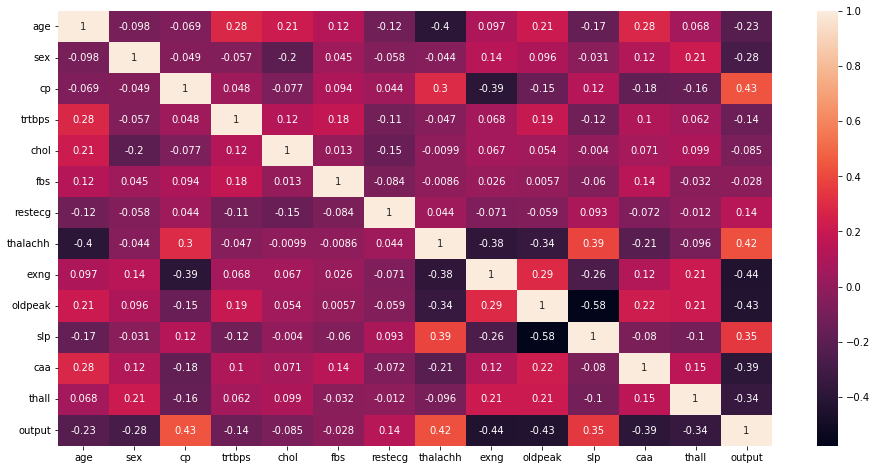

In [8]:
plt.figure(figsize=(16,8))
sns.heatmap(corrlation,annot=True)
plt.show()

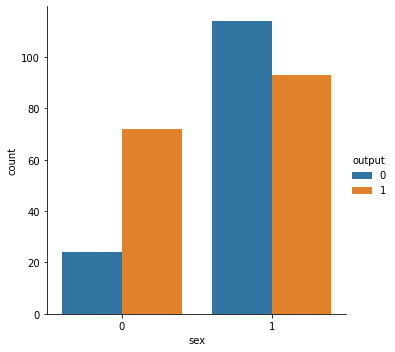

In [9]:
"Analysis between Heart attack based on Gender where output == Heart attack or not"

sns.catplot(x="sex", hue="output", kind="count", data=df)

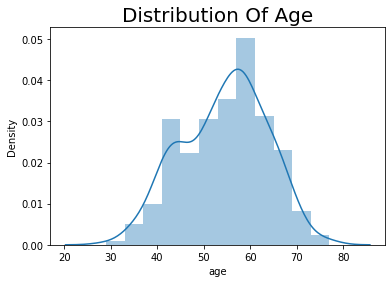

In [10]:
sns.distplot(df["age"])
plt.title("Distribution Of Age",fontsize=20)
plt.show()

## Exploratory Data Analysis

In [11]:
# now we loop through the columns and check for missing values
for col in df.columns:
    pct_missing = df[col].isnull().sum()
    print(f'{col} - {pct_missing :.1%}')

age - 0.0%
sex - 0.0%
cp - 0.0%
trtbps - 0.0%
chol - 0.0%
fbs - 0.0%
restecg - 0.0%
thalachh - 0.0%
exng - 0.0%
oldpeak - 0.0%
slp - 0.0%
caa - 0.0%
thall - 0.0%
output - 0.0%


<AxesSubplot:xlabel='chol'>

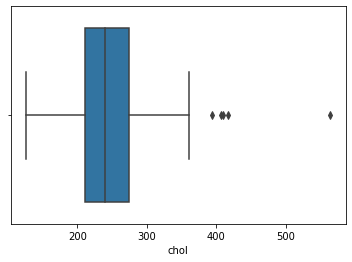

In [12]:
#here we check for outliers 
sns.boxplot(x=df['chol'])

<AxesSubplot:xlabel='trtbps'>

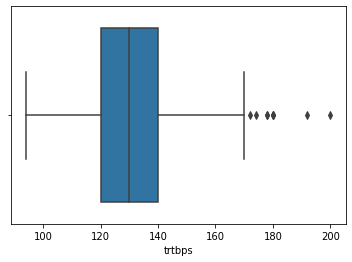

In [13]:
sns.boxplot(x=df['trtbps'])

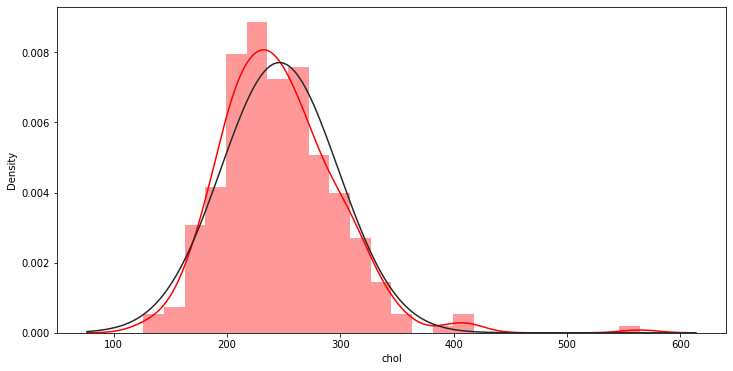

In [14]:
from scipy.stats import skew, skewtest, norm

#cholestrol skewness 
plt.figure(figsize=(12,6))
sns.distplot(df['chol'],fit=norm, color ="r")
plt.show()

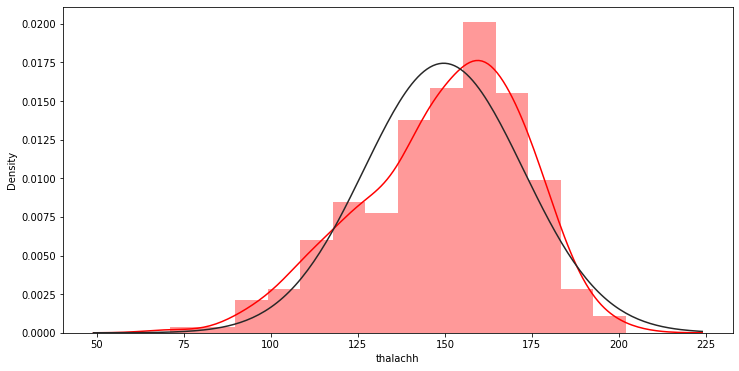

In [15]:
#maximum heart rate skewness

plt.figure(figsize=(12,6))
sns.distplot(df['thalachh'],fit=norm, color ="r")
plt.show()

## Pre-Processing stage

In [16]:
X = df.iloc[:,:-1] # We get all but the output column
y = pd.DataFrame(df["output"]) # We get output column

print("Shape of X:",X.shape,"\nShape of Y:",y.shape)

Shape of X: (303, 13) 
Shape of Y: (303, 1)


In [17]:
#Now, we check for Duplicates In the DataSet
df.duplicated().sum()

1

In [18]:
#We found 1 duplicate value and we are going to remove it now. 
df=df.drop_duplicates(keep="first")

In [19]:
#dataset is clean. 
#Now we start Splitting the data.
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X,y, test_size = 0.15 , random_state = 53)

In [20]:
print("Shape of x train:",x_train.shape,"\nShape of y train:", y_train.shape)
print("Shape of x test:",x_test.shape,"\nShape of y test:", y_test.shape)

Shape of x train: (257, 13) 
Shape of y train: (257, 1)
Shape of x test: (46, 13) 
Shape of y test: (46, 1)


In [21]:
# Importing metrics libraries of sklearn
from sklearn.metrics import accuracy_score , f1_score , recall_score, precision_score

In [22]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [23]:
accuracy_table = pd.DataFrame(columns=["Name", "Accuracy_score", "precision_score", "F1_score","recall_score"], dtype=object)

## Methodology 

In [24]:
from sklearn.naive_bayes import BernoulliNB

model = BernoulliNB().fit(x_train, y_train)
y_pred = model.predict(x_test)

acc = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print("Accuracy: ", round(accuracy_score(y_test, y_pred)*100, 2), "%")
print("F1 accuracy: ", round(f1_score(y_test, y_pred)*100, 2), "%")
print("Precision: ", round(precision_score(y_test, y_pred)*100, 2), "%")
print("Recall : ", round(recall_score(y_test, y_pred)*100, 2), "%")


a_series = pd.Series(["Naive bayes", acc, f1, prec, recall], index = accuracy_table.columns)
accuracy_table = accuracy_table.append(a_series, ignore_index=True)

Accuracy:  95.65 %
F1 accuracy:  95.45 %
Precision:  95.45 %
Recall :  95.45 %


In [25]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, y_pred)

array([[23,  1],
       [ 1, 21]], dtype=int64)

## Results

In [26]:
accuracy_table

,Name,Accuracy_score,precision_score,F1_score,recall_score
0,Naive bayes,0.956522,0.954545,0.954545,0.954545


# Saving the model 

In [27]:
input_data = (55,1,0,160,289,0,0,145,1,0.8,1,1,3)

# now we change the input_data to a numpy array
input_data_as_numpy_array = np.asarray(input_data)

# then, we reshape the array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

# standardize the input data
std_data = scaler.transform(input_data_reshaped)
print(std_data)

prediction = model.predict(std_data)
print(prediction)

if (prediction[0] == 0):
  print('The person is not in risk of a heart attack')
else:
  print('The person is more likely to have heart attack')

[[ 0.05095757  0.70298367 -0.96609378  1.60932575  0.80388055 -0.44198285
  -0.97511706 -0.20370878  1.47405546 -0.18989352 -0.63867791  0.26785779
   1.1697    ]]
[0]
The person is not in risk of a heart attack


# Loading the model

In [28]:
import pickle 

In [29]:
filename = 'trained_model.sav'
pickle.dump(model, open(filename, 'wb'))

In [30]:
# loading the saved model
loaded_model = pickle.load(open('trained_model.sav', 'rb'))

In [31]:
input_data = (55,1,0,160,289,0,0,145,1,0.8,1,1,3)

# now we change the input_data to a numpy array
input_data_as_numpy_array = np.asarray(input_data)

# then, we reshape the array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

# standardize the input data
std_data = scaler.transform(input_data_reshaped)
print(std_data)

prediction = loaded_model.predict(std_data)
print(prediction)

if (prediction[0] == 0):
  print('The person is not in risk of a heart attack')
else:
  print('The person is more likely to have heart attack')

[[ 0.05095757  0.70298367 -0.96609378  1.60932575  0.80388055 -0.44198285
  -0.97511706 -0.20370878  1.47405546 -0.18989352 -0.63867791  0.26785779
   1.1697    ]]
[0]
The person is not in risk of a heart attack
